In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['BMA', 'BMA']
di_sugar2= ['DManpb', 'DManpb']
link= '1-2'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/b1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1CF5', '1CF5', '1CPO', '1CVI', '1DN2', '1DN2', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73', '1EOM', '1EX1', '1F8Q', '1FC1', '1FC1', '1FC2', '1FQ4', '1FQ7', '1FRT', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G9F', '1H3V', '1H3V', '1H3W', '1H3X', '1H3X', '1H3Y', '1H3Y', '1H4P', '1H4P', '1HD4', '1HZH', '1HZH', '1I1A', '1I1A', '1I1C', '1I1C', '1IEQ', '1IEW', '1IEX', '1IGT', '1IGT', '1IGY', '1IGY', '1IQQ', '1J8V', '1K9I', '1K9I', '1K9I', '1K9I', '1K9I', '1K9J', '1KJ2', '1L6X', '1LGB', '1LGC', '1LGC', '1LGC', '1LOF', '1LOF', '1LQ2', '1LTE', '1MCO', '1MYR', '1MYR', '1OQO', '1OQO', '1OW0', '1OW0', '1OW0', '1OW0', '1P8J', '1PPF', '1PPG', '1RER', '1RER

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 19 
valid torsion1 and torsion2: (19, 19)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['9.C', '3.C'], ['4C1', '4C1'])
(['10.C', '9.C'], ['1S3', '4C1'])
(['7.C', '3.C'], ['4C1', '4C1'])
(['7.E', '6.E'], ['4C1', 'O3B'])
(['5.E', '4.E'], ['4C1', '4C1'])
(['8.E', '6.E'], ['4C1', 'O3B'])
(['5.D', '4.D'], ['-', '4C1'])
(['4.D', '3.D'], ['4C1', '4C1'])
(['3.C', '2.C'], ['-', '4C1'])
(['3.D', '2.D'], ['1S5', '4C1'])
(['4.O', '3.O'], ['-', '-'])
(['7.O', '6.O'], ['-', '4C1'])
(['5.O', '4.O'], ['4C1', '-'])
(['6.O', '3.O'], ['4C1', '-'])
(['4.B', '3.B'], ['4C1', '-'])
(['4.D', '3.D'], ['-', '4C1'])
(['6.D', '5.D'], ['4C1', '-'])
(['5.D', '4.D'], ['-', '-'])
(['7.D', '3.D'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//1h4p.pdb C BMA 9 C1
../../pdbs//1h4p.pdb C BMA 3 O2
6745 6685
No connection found between 6745 and 6685
0
../../pdbs//1h4p.pdb C BMA 10 C1
../../pdbs//1h4p.pdb C BMA 9 O2
6756 6751
Connection found between 6756 and 6751
../../pdbs//1h4p.pdb C BMA 7 C1
../../pdbs//1h4p.pdb C BMA 3 O2
6723 6685
No connection found between 6723 and 6685
2
../../pdbs//1h4p.pdb E BMA 7 C1
../../pdbs//1h4p.pdb E BMA 6 O2
6900 6895
No connection found between 6900 and 6895
3
../../pdbs//1h4p.pdb E BMA 5 C1
../../pdbs//1h4p.pdb E BMA 4 O2
6878 6873
Connection found between 6878 and 6873
../../pdbs//1h4p.pdb E BMA 8 C1
../../pdbs//1h4p.pdb E BMA 6 O2
6911 6895
No connection found between 6911 and 6895
5
../../pdbs//2djg.pdb D BMA 5 C1
../../pdbs//2djg.pdb D BMA 4 O2
2774 2769
Connection found between 2774 and 2769
../../pdbs//2djg.pdb D BMA 4 C1
../../pdbs//2djg.pdb D BMA 3 O2
2763 2758
No connection found between 2763 and 2758
7
../../pdbs//5b0s.pdb C BMA 3 C1
../../pdbs//5b0s.pdb C BMA 2 O2
5665 5

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,1h4p.pdb,C BMA 10 C2 C1 BMA 9 O2 C,C BMA 10 C1 BMA 9 O2 C2 C,127.2710,306.1016,"([BMA(10_C_), BMA(9_C_)], [92.9, 87.57])",MAN(8_C_)-BMA(7_C_)-[BMA(6_C_)-MAN(5_C_)]-MAN(...,DManpb1-2DManpa1-3[DManpa1-2DManpb1-6]DManpa1-...,"([10.C, 9.C], [1S3, 4C1])"
1,1h4p.pdb,E BMA 5 C2 C1 BMA 4 O2 C2,E BMA 5 C1 BMA 4 O2 C2 C3,161.9010,141.9450,"([BMA(5_E_), BMA(4_E_)], [89.4, 85.83])",BMA(8_E_)-[BMA(7_E_)]-BMA(6_E_)-[BMA(5_E_)-BMA...,DManpb1-2DManpb1-3[DManpb1-3[DManpb1-6]DManpb1...,"([5.E, 4.E], [4C1, 4C1])"
2,2djg.pdb,D BMA 5 C2 C1 BMA 4 O2 C2,D BMA 5 C1 BMA 4 O2 C2 C3,115.3830,296.7420,"([BMA(5_D_), BMA(4_D_)], [54.24, 65.29])",BMA(5_D_)-BMA(4_D_)-BMA(3_D_)-NAG(2_D_)-NAG(1_...,DManpb1-2DManpb1-3DManpb1-4DGlcpNAcb1-4DGlcpNA...,"([5.D, 4.D], [-, 4C1])"
3,5b0s.pdb,C BMA 3 C2 C1 BMA 2 O2 C2,C BMA 3 C1 BMA 2 O2 C2 C3,196.1480,149.8960,"([BMA(3_C_), BMA(2_C_)], [27.18, 28.46])",BMA(3_C_)-BMA(2_C_)-MAN(1_C_),DManpb1-2DManpb1-2DManpa1-ROH,"([3.C, 2.C], [-, 4C1])"
4,5b0s.pdb,D BMA 3 C2 C1 BMA 2 O2 C2,D BMA 3 C1 BMA 2 O2 C2 C3,195.7820,162.5960,"([BMA(3_D_), BMA(2_D_)], [28.65, 30.08])",BMA(3_D_)-BMA(2_D_)-MAN(1_D_),DManpb1-2DManpb1-2DManpa1-ROH,"([3.D, 2.D], [1S5, 4C1])"
5,7eeb.pdb,O BMA 5 C2 C1 BMA 4 O2 C2,O BMA 5 C1 BMA 4 O2 C2 C3,324.6471,128.0410,"([BMA(5_O_), BMA(4_O_)], [106.41, 86.74])",BMA(7_O_)-BMA(6_O_)-[BMA(5_O_)-BMA(4_O_)]-BMA(...,DManpb1-2DManpb1-3[DManpb1-3DManpb1-6]DManpb1-...,"([5.O, 4.O], [4C1, -])"
6,4x1h.pdb,B BMA 4 C2 C1 BMA 3 O2 C2,B BMA 4 C1 BMA 3 O2 C2 C3,185.6610,85.2456,"([BMA(4_B_), BMA(3_B_)], [127.69, 105.68])",BMA(4_B_)-BMA(3_B_)-NAG(2_B_)-NAG(1_B_)-ASN(15...,DManpb1-2DManpb1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([4.B, 3.B], [4C1, -])"
7,6c26.pdb,D BMA 4 C2 C1 BMA 3 O2 C2,D BMA 4 C1 BMA 3 O2 C2 C3,242.6490,116.3270,"([BMA(4_D_), BMA(3_D_)], [59.16, 54.97])",BMA(7_D_)-[BMA(6_D_)-BMA(5_D_)-BMA(4_D_)]-BMA(...,DManpb1-2DManpb1-2DManpb1-2[DManpb1-6]DManpb1-...,"([4.D, 3.D], [-, 4C1])"
8,6c26.pdb,D BMA 6 C2 C1 BMA 5 O2 C2,D BMA 6 C1 BMA 5 O2 C2 C3,114.4460,305.9411,"([BMA(6_D_), BMA(5_D_)], [64.31, 61.3])",BMA(7_D_)-[BMA(6_D_)-BMA(5_D_)-BMA(4_D_)]-BMA(...,DManpb1-2DManpb1-2DManpb1-2[DManpb1-6]DManpb1-...,"([6.D, 5.D], [4C1, -])"
9,6c26.pdb,D BMA 5 C2 C1 BMA 4 O2 C2,D BMA 5 C1 BMA 4 O2 C2 C3,100.1210,303.9309,"([BMA(5_D_), BMA(4_D_)], [61.3, 59.16])",BMA(7_D_)-[BMA(6_D_)-BMA(5_D_)-BMA(4_D_)]-BMA(...,DManpb1-2DManpb1-2DManpb1-2[DManpb1-6]DManpb1-...,"([5.D, 4.D], [-, -])"


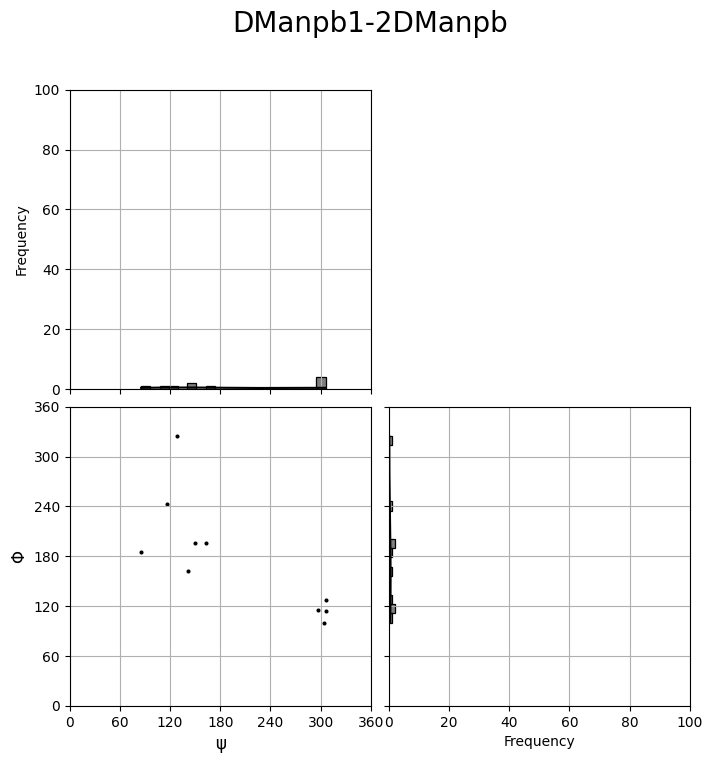

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)